In [3]:
#Group project DSCI 100 Group #3

# Testing if github collaboration works

library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

# Classifying Stellar Observations


Main question: 
Can we use the SDSS measurements available to us to predict whether a future stellar body of an unknown type is either a star, quasar or galaxy? 


Dataset of interest: 2017 Stellar Classification (SDSS17) https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

Preliminary exploratory data analysis: the cell below demonstrates reading our data into R.



In [ ]:
star_data <- read_csv("https://raw.githubusercontent.com/Margokap/DSCI100-group-03/main/star_classification.csv")
## clean data (use tidy data criteria); 
# each row is a single observation,
# each column is a single variable, and
# each value is a single cell (i.e., its entry in the data frame is not shared with another value).

##tidying data:

star_data_tidy <- mutate(star_data, ascension_angle = alpha, declination_angle = delta,
                        ultraviolet_filter = u, green_filter = g, red_filter = r,
                        near_infrared_filter = i, infrared_filter = z, class = as.factor(class))
(star_data_tidy <- select(star_data_tidy, ascension_angle, declination_angle, ultraviolet_filter, green_filter, 
                          red_filter, near_infrared_filter, infrared_filter, redshift, class))



Rows: 100000 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): class
dbl (17): obj_ID, alpha, delta, u, g, r, i, z, run_ID, rerun_ID, cam_col, fi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ascension_angle,declination_angle,ultraviolet_filter,green_filter,red_filter,near_infrared_filter,infrared_filter,redshift,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
135.6891,32.49463,23.87882,22.27530,20.39501,19.16573,18.79371,0.6347936,GALAXY
144.8261,31.27418,24.77759,22.83188,22.58444,21.16812,21.61427,0.7791360,GALAXY
142.1888,35.58244,25.26307,22.66389,20.60976,19.34857,18.94827,0.6441945,GALAXY
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
224.5874,15.70071,21.16916,19.26997,18.20428,17.69034,17.35221,0.1433656,GALAXY
212.2686,46.66037,25.35039,21.63757,19.91386,19.07254,18.62482,0.4550396,GALAXY
196.8961,49.46464,22.62171,21.79745,20.60115,20.00959,19.28075,0.5429442,GALAXY


class,mean_ascension_angle,mean_declination_angle,mean_ultraviolet_filter,mean_green_filter,mean_red_filter,mean_near_infrared_filter,mean_infrared_filter,mean_redshift,number_of_stellar_type
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
GALAXY,185.3793,23.19479,22.59625,20.90607,19.62142,18.89166,18.50770,4.307979e-01,450
QSO,192.8200,26.97996,21.56526,20.91360,20.67209,20.46619,20.37847,1.837380e+00,135
STAR,181.3555,22.07580,21.14949,19.64172,18.88701,18.54075,18.33087,-6.538224e-05,164


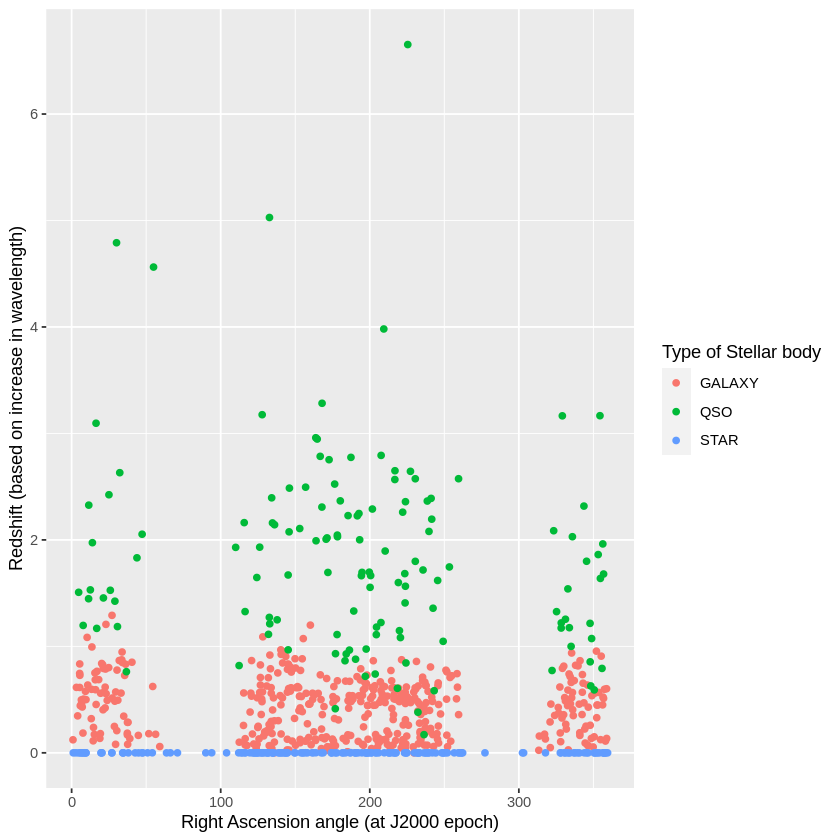

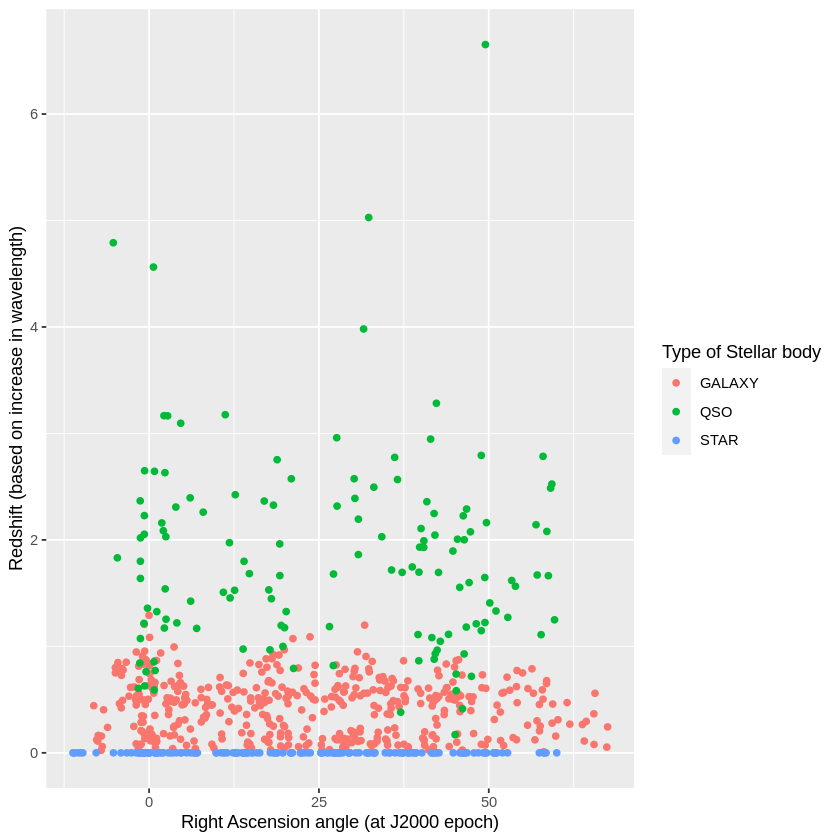

In [51]:
#Split Train and Testing data

star_data_tidy <- star_data_tidy |>
                  sample_n(1000)

star_split <- initial_split(star_data_tidy, prop = 0.75, strata = class)
star_training <- training(star_split)
star_testing <- testing(star_split)

star_table <- star_training |>
              group_by(class) |>
              summarize(mean_ascension_angle = mean(ascension_angle), mean_declination_angle = mean(declination_angle),
                        mean_ultraviolet_filter = mean(ultraviolet_filter), mean_green_filter = mean(green_filter),
                        mean_red_filter = mean(red_filter), mean_near_infrared_filter = mean(near_infrared_filter), mean_infrared_filter = mean(infrared_filter),
                        mean_infrared_filter = mean(infrared_filter), mean_redshift = mean(redshift), number_of_stellar_type = n())
star_table



(redshit_vs_ascension <- ggplot(star_training, aes(y = redshift, x = ascension_angle, color = class)) +
                              geom_point() +
                              labs(y = "Redshift (based on increase in wavelength)", x = "Right Ascension angle (at J2000 epoch)", color = "Type of Stellar body") +
                              theme(text = element_text(size=20)))
(redshit_vs_declination <- ggplot(star_training, aes(y = redshift, x = declination_angle, color = class)) +
                              geom_point() +
                              labs(y = "Redshift (based on increase in wavelength)", x = "Right Ascension angle (at J2000 epoch)", color = "Type of Stellar body") +
                              theme(text = element_text(size=20)))




Methods:
In our subsetted dataset, we will use the following variables in order to predict the type of stellar body of a new observation: ascension_angle, declination_angle, ultraviolet_filter,	green_filter, red_filter, near_infrared_filter, infrared_filter, and redshift. In previous astronomical literature and astronomical classification models, most of these factors have been demonstrated to be correlated with stellar body type, and thus may contribute to determine the class of an astronomical event (Finlay-Freundlich, 1954; Wierzbiński et al. 2021; Simet et al. 2021) . Particularly, whether a stellar body is of type galaxy, quasar or star. In our analysis, we will we will perform a classification to predict the category of a new observation using past observations of known class. In particular, we will predict whether a new observation is of class galaxy, quasar or star, based on past observations of described type of stellar body.



Expected outcomes and significance:

What do you expect to find?
What impact could such findings have?
What future questions could this lead to?

Literature Cited: 
Wierzbiński, M., Pławiak, P., Hammad, M., & Acharya, U. R. (2021). Development of accurate classification of heavenly bodies using novel machine learning techniques. Soft Computing, 25(10), 7213-7228.

Becker, I., Pichara, K., Catelan, M., Protopapas, P., Aguirre, C., & Nikzat, F. (2020). Scalable end-to-end recurrent neural network for variable star classification. Monthly Notices of the Royal Astronomical Society, 493(2), 2981-2995.

Finlay-Freundlich, E. (1954). Red-shifts in the spectra of celestial bodies. Proceedings of the Physical Society. Section A, 67(2), 192.

Simet, M., Chartab, N., Lu, Y., & Mobasher, B. (2021). Comparison of observed galaxy properties with semianalytic model predictions using machine learning. The Astrophysical Journal, 908(1), 47.